In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

In [2]:
claims = pd.read_csv("C:/python_casestudies/Pandas Case Study3_Insurance Claims Case Study/claims.csv")
cust_demo = pd.read_csv("C:/python_casestudies/Pandas Case Study3_Insurance Claims Case Study/cust_demographics.csv")

In [3]:
cust_demo.dtypes

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [4]:
cust_data = pd.merge(left = claims, right = cust_demo, how = 'left', left_on = 'customer_id', right_on = 'CUST_ID')
cust_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the 
columns and their business significance.

In [5]:
cust_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [6]:
#type casting claim_date and DateOfBirth to datetime
cust_data.claim_date = pd.to_datetime(cust_data.claim_date, format = "%m/%d/%Y")
#type casting CUST_ID to integer 
cust_data['CUST_ID'] = cust_data['CUST_ID'].astype(pd.Int32Dtype())
cust_data.DateOfBirth = pd.to_datetime(cust_data.DateOfBirth)

In [7]:
#removing '-' special characters and typecasting the variable
cust_data.Contact = pd.to_numeric(cust_data.Contact.str.replace("-",""), downcast = "signed")

In [8]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
CUST_ID                1085 non-null Int32
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null float64
Segment                1085 non-null object
dtypes: Int32(1), datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 142.9+ KB


3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [9]:
cust_data.claim_amount = pd.to_numeric(cust_data.claim_amount.str.replace("$",""), downcast = "float")

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
cust_data['Flag'] = np.where(cust_data.police_report == 'Unknown',0,1)

In [11]:
cust_data.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,9.568719e+09,Gold,1
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,4.197129e+09,Gold,1
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,7.523983e+09,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,2.569689e+09,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,1.423247e+09,Silver,0
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,2066-09-09,RI,1.655195e+09,Gold,1


# 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [12]:
cust_data.drop_duplicates(subset = 'CUST_ID', keep = 'last')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,7.523983e+09,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,2.569689e+09,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,1.423247e+09,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,2064-10-22,LA,4.693456e+09,Silver,1
1084,63226031,61575264,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,61575264,Male,1995-07-12,WY,1.823851e+09,Gold,1


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [13]:
#finding the percentage of missing values
cust_data.isna().sum()/ cust_data.isna().count()

claim_id               0.000000
customer_id            0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount           0.059091
total_policy_claims    0.009091
fraudulent             0.000000
CUST_ID                0.013636
gender                 0.013636
DateOfBirth            0.013636
State                  0.013636
Contact                0.013636
Segment                0.013636
Flag                   0.000000
dtype: float64

In [14]:
#seperating cat and  num variables which have missing values
cat_col = ['gender', 'State', 'Segment']
num_col = ['claim_amount', 'total_policy_claims']

In [15]:
#imputing missing values using for cat variables and mean for continious variables
for col in cat_col:
    cust_data[col] = cust_data[col].fillna(cust_data[col].mode()[0])
for col in num_col:
    cust_data[col] = cust_data[col].fillna(cust_data[col].mean())

In [16]:
# since variables like 'contact', 'DateOfBirth', 'CUST_ID' have not been imputed beacause, 
# they doesnt give any meaning while imputing to those variable, so deleting the records that contain NA values for those variables.
cust_data.dropna(subset = ['DateOfBirth'], inplace = True )

In [17]:
cust_data.isna().sum()/ cust_data.isna().count()

claim_id               0.0
customer_id            0.0
incident_cause         0.0
claim_date             0.0
claim_area             0.0
police_report          0.0
claim_type             0.0
claim_amount           0.0
total_policy_claims    0.0
fraudulent             0.0
CUST_ID                0.0
gender                 0.0
DateOfBirth            0.0
State                  0.0
Contact                0.0
Segment                0.0
Flag                   0.0
dtype: float64

In [18]:
cust_data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Flag                   0
dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [19]:
curr_year = pd.DatetimeIndex(cust_data['claim_date']).year
dob_year = pd.DatetimeIndex(cust_data['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
cust_data['Age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
cust_data.loc[(cust_data.Age < 18),'AgeGroup'] = 'Children'
cust_data.loc[(cust_data.Age >=18) & (cust_data.Age <30),'AgeGroup'] = 'Youth'
cust_data.loc[(cust_data.Age >=30) & (cust_data.Age <60),'AgeGroup'] = 'Adult'
cust_data.loc[(cust_data.Age >=60),'AgeGroup'] = 'Senior'


In [20]:
cust_data.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag,Age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1,38,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,2070-01-13,ME,2.655431e+09,Silver,0,48,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1,34,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1,32,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,9.568719e+09,Gold,1,41,Adult
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,4.197129e+09,Gold,1,40,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,7.523983e+09,Gold,1,19,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,2.569689e+09,Silver,1,19,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,1.423247e+09,Silver,0,25,Youth
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,2066-09-09,RI,1.655195e+09,Gold,1,51,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [21]:
cust_data.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12828.132812
Platinum    12340.893555
Silver      12206.379883
Name: claim_amount, dtype: float32

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [22]:
ttl_amt = cust_data[cust_data.claim_date < '2018-9-11'].groupby('incident_cause')['claim_amount'].sum() 
ttl_amt

incident_cause
Crime                  724320.625
Driver error          3319645.500
Natural causes        1313890.625
Other causes          3724499.500
Other driver error    3318437.750
Name: claim_amount, dtype: float32

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [23]:
cust_data.loc[(cust_data['AgeGroup'] == 'Adult') & ((cust_data['State'] == 'TX') | (cust_data['State'] == 'DE') | (cust_data['State'] == 'AK')) & (cust_data['incident_cause'].isin(['Driver error','Other driver error'])), ].groupby('State')['State'].count()

State
AK    9
DE    9
TX    7
Name: State, dtype: int64

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [24]:
claim =  cust_data.pivot_table(index = 'gender', columns = 'Segment', values = 'claim_amount', aggfunc = 'sum')
claim

Segment,Gold,Platinum,Silver
gender,,,
Female,2109508.25,2369305.0,1901579.625
Male,2701041.75,2098098.5,2346240.500


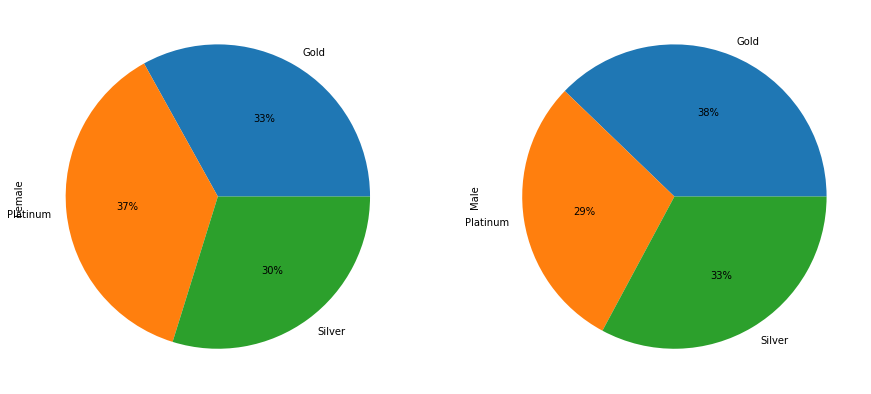

In [25]:
claim.T.plot(kind = 'pie', subplots = True, legend = False, figsize = (15,8), autopct='%1.0f%%')
plt.show()

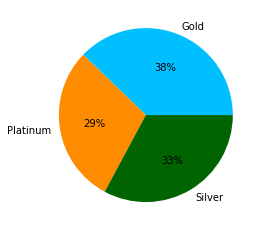

In [26]:
plt.pie(x = claim.loc['Male',:],
            labels=['Gold', 'Platinum', 'Silver'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? 
   E.g. This metric can be compared using a bar chart

In [27]:
total_claims_gender = cust_data.loc[(cust_data['incident_cause'].isin(['Driver error','Other driver error'])),].groupby('gender')['gender'].count()
total_claims_gender

gender
Female    222
Male      284
Name: gender, dtype: int64

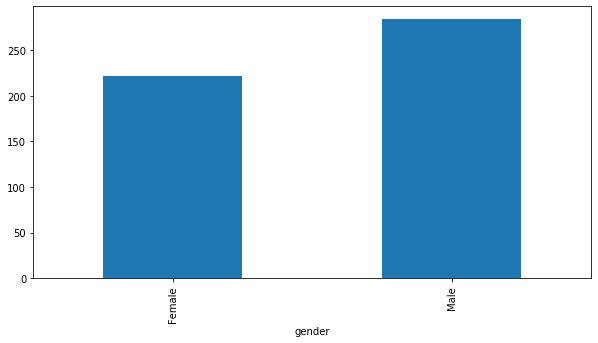

In [28]:
total_claims_gender.plot(kind = 'bar', figsize = (10,5))
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

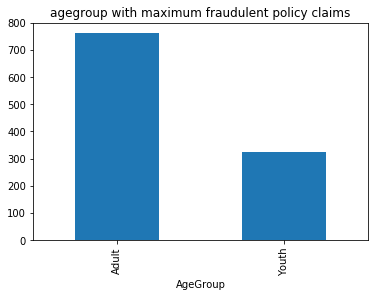

In [29]:
cust_data.groupby('AgeGroup')['fraudulent'].count().plot(kind = 'bar')
plt.title("agegroup with maximum fraudulent policy claims")
plt.show()

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

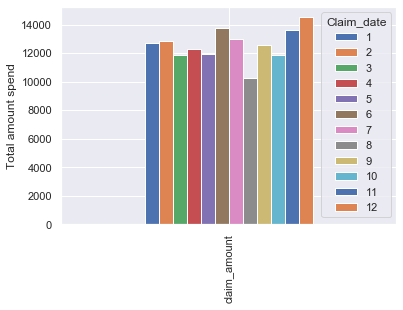

In [41]:
cust_data['claim_date'] = pd.to_datetime(cust_data['claim_date'])
cust_data['Claim_date'] = cust_data['claim_date'].dt.month

sns.set()
pd.pivot_table(cust_data,columns ='Claim_date',values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart,one facet that represents fraudulent claims and the other for non-fraudulent claims.

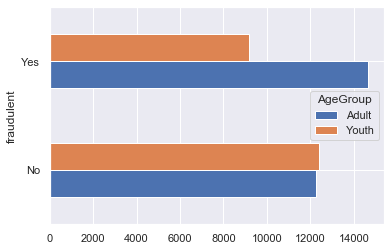

In [42]:
cust_data.pivot_table(columns = 'AgeGroup', index = 'fraudulent',
                 values = 'claim_amount', aggfunc = 'mean').plot( kind = 'barh' )
plt.show()

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

# 16. Is there any similarity in the amount claimed by males and females?

In [32]:
#H0 : There is similarity in the amount claimed by males and females.   (u_males = u_females)
#Ha : There is a difference in the amount claimed by males and females.  (u_males <> u_females)
# CI = 95% | p-value = 0.05

amt_claim = 'claim_amount'

#get the male and female claim amount
male_claim = cust_data.loc[cust_data.gender == 'Male', amt_claim]
female_claim = cust_data.loc[cust_data.gender == 'Female', amt_claim]

#print the average.
print('mean_male:', male_claim.mean(), '| MeanFemale :', female_claim.mean())

mean_male: 12851.4013671875 | MeanFemale : 12061.2333984375


In [33]:
#perform the test 
stats.ttest_ind(male_claim, female_claim)


Ttest_indResult(statistic=0.9734994781869301, pvalue=0.330522499899641)

#Therefore p-values '0.330522499899641' is greater than 0.05 Hence we can say that we failed to reject null hypothesis.
#We safely conclude that there is a similarity in the amount claimed by males and females.

# 17. Is there any relationship between age category and segment?

In [34]:
# CI = 95% | p-value = 0.05
# get the cross table of age category and segment variable.
obs = pd.crosstab(cust_data.AgeGroup, cust_data.Segment, margins = True)
obs

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,270,245,247,762
Youth,105,117,101,323
All,375,362,348,1085


In [35]:
# perform the test
stats.chi2_contingency(obs)

(1.781076907892987,
 0.9386919799147335,
 6,
 array([[ 263.3640553 ,  254.23410138,  244.40184332,  762.        ],
        [ 111.6359447 ,  107.76589862,  103.59815668,  323.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

# conclusion :
the p-value '0.9386919799147335' is significantly greater than 0.05. So, we fail to reject null hypothesis
there is no relationship between age category and Segment both are independent

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

# 19. Is there any difference between age groups and insurance claims?

In [36]:
# CI = 95% | p-value  = 0.05
#data preparation
age_group1 = cust_data.loc[cust_data.AgeGroup == 'Youth', 'total_policy_claims']
age_group2 = cust_data.loc[cust_data.AgeGroup == 'Adult', 'total_policy_claims']
print('Mean age_group1:', age_group1.mean(), '| Mean age_group2:', age_group2.mean())

Mean age_group1: 1.6197631152895733 | Mean age_group2: 1.573141660044788


In [37]:
#perform the test
stats.f_oneway(age_group1, age_group2)

F_onewayResult(statistic=0.37814187261090576, pvalue=0.5387285347470242)

# conclusion:
Since the significance value of the test is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [38]:
#CI = 95% | p-value = 0.05
#perform the test
stats.pearsonr(x = cust_data.total_policy_claims, y = cust_data.claim_amount)

(-0.017440324613317907, 0.5660664624730555)

# conclusion :
The total number of policy claims is inversely proportional to the claimed amount